## Observations and Insights 

In [ ]:
#Look across all previously generated figures and tables and write at least three observations or inferences that 
#can be made from the data. Include these observations at the top of notebook.
#Observation/Inference 1: Ramicane seems to be the most successful at making tumor sizes smaller based on its mean, median and variance.
#Observation/Inference 2: Capomulin and Ramicane have the largest sample sizes. It may be safe to infer that they were tested more once some of the first mice returned more positive results than other drug regimens.
#Observation/Inference 3: According to the correlation coefficient of 0.53, mouse weight and tumor size are moderately correlated.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
mouse_count = merge_df.nunique()["Mouse ID"]
mouse_count



249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicaterow = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicaterow)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df= merge_df.drop(merge_df[merge_df['Mouse ID'] == 'g989'].index)


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_count = merge_df.nunique()["Mouse ID"]
mouse_count

248

## Summary Statistics

In [6]:
grouped = merge_df.groupby(['Drug Regimen'])
grouped.mean()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.006757,27.135135,17.060811,52.320930,1.013514
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_mean = grouped['Tumor Volume (mm3)'].mean()
mouse_mean
mouse_median = grouped['Tumor Volume (mm3)'].median()
#merge_df.describe()
mouse_var = grouped['Tumor Volume (mm3)'].var()
mouse_var
mouse_stddev = grouped['Tumor Volume (mm3)'].std()
mouse_stddev
mouse_sem = grouped['Tumor Volume (mm3)'].sem()
mouse_sem
#summary = pd.DataFrame(mouse_df)
#summary
mouse_mean
names = ["Mean","Median","Variance","Standard Deviation","Standard Error of Mean"]
mousefinal_df = pd.concat([mouse_mean, mouse_median,mouse_var,mouse_stddev,mouse_sem], axis=1)
mousefinal_df
mousefinal_df.columns = names
mousefinal_df = mousefinal_df.sort_values(by=['Mean'])
mousefinal_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots

Text(0, 0.5, 'Count')

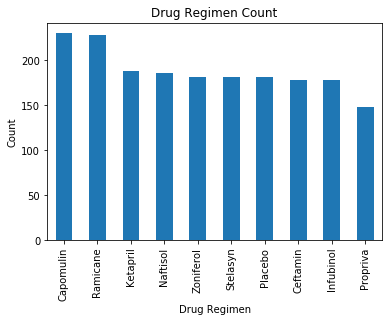

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
merge_df['Drug Regimen'].value_counts().plot(kind='bar')
plt.title('Drug Regimen Count')
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

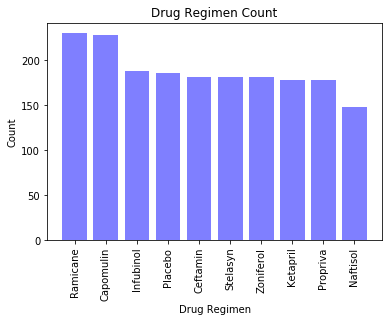

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
datacount = merge_df['Drug Regimen'].value_counts()
plt.bar(merge_df['Drug Regimen'].unique(), merge_df['Drug Regimen'].value_counts(),color='b', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Drug Regimen Count")
plt.xticks(rotation=90)

## Pie Plots

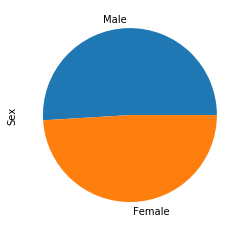

In [11]:
merge_df['Sex'].value_counts().plot(kind='pie')

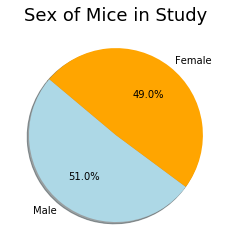

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count=merge_df["Sex"].value_counts()
sextype=merge_df["Sex"].unique()
gender=list(sex_count.index.values)
colors=["lightblue", "orange"]
plt.pie(sex_count, labels=sextype, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size']=15
plt.title("Sex of Mice in Study")
plt.show()
#merge_df

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#NEED TO PULL ONLY 45 TIMEPOINT
#tumors = merge_df['Tumor Volume (mm3)']
tumors1 = merge_df.loc[merge_df['Timepoint'] == 45]
tumors = tumors1['Tumor Volume (mm3)']
#tumors1 = tumors['Tumor Volume (mm3)']
quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumors is: {lowerq}")
print(f"The upper quartile of tumors is: {upperq}")
print(f"The interquartile range of tumors is: {iqr}")
print(f"The the median of tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumors is: 40.6583443125
The upper quartile of tumors is: 68.8702959775
The interquartile range of tumors is: 28.211951665000008
The the median of tumors is: 63.53754596 
Values below -1.6595831850000096 could be outliers.
Values above 111.18822347500002 could be outliers.


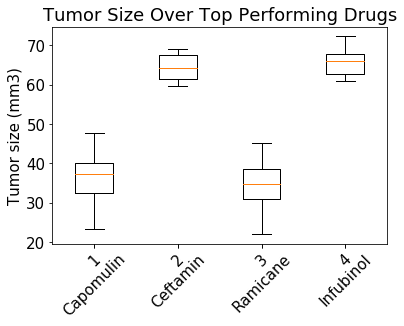

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = tumors1.loc[tumors1['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
#Capomulin = Capomulin['Timepoint']==45
Ceftamin = tumors1.loc[tumors1['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']
Ramicane = tumors1.loc[tumors1['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
Infubinol = tumors1.loc[tumors1['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
top4 = [Capomulin, Ceftamin, Ramicane, Infubinol]
#top4

#fig = plt.figure(1, figsize=(100,100))

# Create an axes instance
#ax = fig.add_subplot(111)
#['Capomulin','Ceftamin','Ramicane','Propriva']
red_diamond = dict(markerfacecolor='r', marker='D')
# Create the boxplot
plt.title('Tumor Size Over Top Performing Drugs')
plt.ylabel('Tumor size (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin','Ceftamin','Ramicane','Infubinol'], rotation = 45)
plt.boxplot(top4,flierprops=red_diamond)
plt.show()

## Line and Scatter Plots

In [16]:
merge_df.loc[merge_df['Mouse ID']=='r554']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
125,r554,Capomulin,Female,8,17,0,45.000000,0
126,r554,Capomulin,Female,8,17,5,45.781746,1
127,r554,Capomulin,Female,8,17,10,39.005494,2
128,r554,Capomulin,Female,8,17,15,35.463758,2
129,r554,Capomulin,Female,8,17,20,36.015589,2
130,r554,Capomulin,Female,8,17,25,33.893345,3
131,r554,Capomulin,Female,8,17,30,32.680655,3
132,r554,Capomulin,Female,8,17,35,33.069337,3
133,r554,Capomulin,Female,8,17,40,31.804841,3
134,r554,Capomulin,Female,8,17,45,32.377357,3


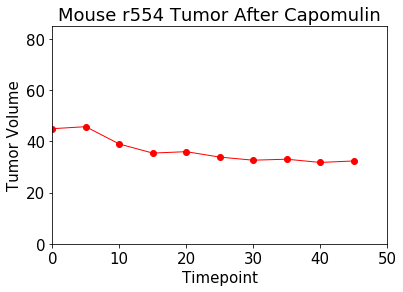

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.title("Mouse r554 Tumor After Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

Timepoint = merge_df.loc[merge_df['Mouse ID']=='r554']['Timepoint']
Capo = merge_df.loc[merge_df['Mouse ID']=='r554']['Tumor Volume (mm3)']
#tumors45 = merge_df.loc[merge_df['Timepoint'] == 45]

#Need to get average tumor volumes over data points 0 thru 45
#Cap_time = merge_df.loc[merge_df['Drug Regimen']=='Capomulin']
#Cap_life = Cap_time.groupby(['Timepoint'])
#Cap_life
#Cap_vol = Cap_life(['Tumor Volume (mm3)'])
#Cap_vol = merge_df.loc[merge_df['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'].mean()
#plt.hlines(0, 0, x_lim, alpha=0.2)
plt.xlim(0,50)
plt.ylim(0,85)

plt.plot(Timepoint, Capo, marker="o", color="red", linewidth=1)
plt.show()

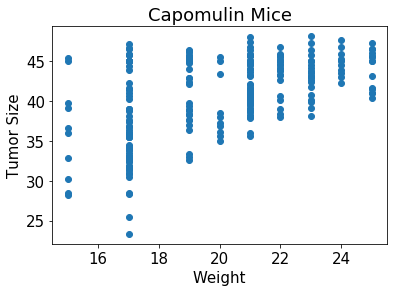

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values=merge_df.loc[merge_df['Drug Regimen']=='Capomulin']['Weight (g)']
y_values=merge_df.loc[merge_df['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']

plt.scatter(x_values,y_values)
plt.xlabel("Weight")
plt.ylabel("Tumor Size")
plt.title("Capomulin Mice")
plt.show()

## Correlation and Regression

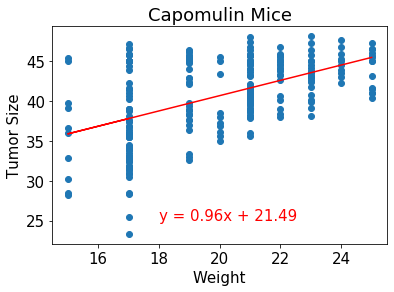

The correlation coefficient between tumor size and weight is 0.53


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,25),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Size')
plt.title("Capomulin Mice")
plt.show()
print(f"The correlation coefficient between tumor size and weight is {round(st.pearsonr(x_values,y_values)[0],2)}")